In [2]:
with open('13a.txt') as f:
    lines = f.readlines()

lines = [line.strip() for line in lines]

In [3]:
# initial size is 895 rows x 1311 cols 
import numpy as np
grid = np.zeros((895, 1311))
init_rows = 895
init_cols = 1311
folds = []
for line in lines:
    if len(line) == 0:
        pass
    elif line[0] != 'f':
        col, row = line.split(',')
        row = int(row)
        col = int(col)
        grid[row][col] = 1
    else:
        left, num = line.split('=')
        coord = left[-1]
        folds.append((coord, int(num)))

### Part 1

In [4]:
grid[852][207]

1.0

In [5]:
coord, split = folds[0]
deducer = 0
for row in range(len(grid)):
    for col in range(int((len(grid[row])-1)/2)):
        if grid[row][col] == 1.0 and grid[row][len(grid[row])-1-col] == 1.0:
            deducer += 1
total = 0
for row in range(len(grid)):
    for col in range(len(grid[row])):
        total += grid[row][col]

print(total - deducer)

638.0


### Part 2

In [29]:
def fold_grid(grid, coord, num):
    if coord == 'y':
        folded = np.zeros((int((len(grid)-1)/2),len(grid[0])))
        for row in range(int((len(grid)-1)/2)):
            for col in range(len(grid[row])):
                if grid[row][col] == 1.0 or grid[len(grid)-1-row][col] == 1.0:
                    folded[row][col] = 1
        return folded
        
    elif coord == 'x':
        folded = np.zeros((len(grid), int((len(grid[0])-1)/2)))
        for row in range(len(grid)):
            for col in range(int((len(grid[row])-1)/2)):
                if grid[row][col] == 1.0 or grid[row][len(grid[row])-1-col] == 1.0:
                    folded[row][col] = 1
        return folded
    else: return grid.copy()

In [22]:
def count_dots(grid):
    counter = 0
    for row in range(len(grid)):
        for col in range(len(grid[row])):
            counter += grid[row][col]
    return counter

In [23]:
test_grid = grid.copy()
test_coord, test_num = folds[0]
folded_grid = fold_grid(test_grid, test_coord, test_num)
print(count_dots(folded_grid))

638.0


In [31]:
folding_grid = grid.copy()
counter = 0
for fold in folds:
    # counter += 1
    # print(counter)
    folding_grid = fold_grid(folding_grid, fold[0], fold[1])

In [35]:
print(folding_grid)

[[0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
  0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
  0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
  0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
  0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
  0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.]]


ValueError: Unknown format code 'd' for object of type 'float'

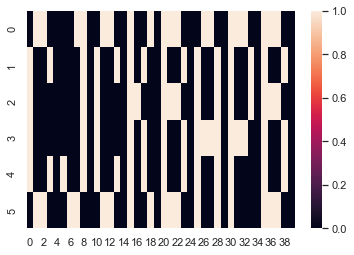

In [36]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.heatmap(folding_grid, annot=True, fmt="d")

plt.title("How to visualize (plot) \n a numpy array in python using seaborn ?",fontsize=12)

plt.savefig("visualize_numpy_array_01.png", bbox_inches='tight', dpi=100)

plt.show()